<a href="https://colab.research.google.com/github/uzma-knpc/Generative-AI/blob/main/image1diagnosereport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install -Uq facenet-pytorch
!pip install -Uq pillow


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
facenet-pytorch 2.6.0 requires Pillow<10.3.0,>=10.2.0, but you have pillow 11.1.0 which is incompatible.


In [2]:
import torch
import torch.nn as nn
import torchvision.models as models

import torchvision.transforms as transforms
from PIL import Image

# MEDICAL IMAGE IMPORT AND GEMEINI TALK

In [3]:
#Python SDK install
!pip install -U -q google-generativeai>0.7.2
!pip install -U google-generativeai

In [4]:
#import the code from google colab
import google.generativeai as genai
import os

from google.colab import userdata
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

In [26]:
!curl -o image.jpg "https://kcuk.cdn.ngo/media/images/MAG3_scan.width-700.jpg"


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 29341  100 29341    0     0   197k      0 --:--:-- --:--:-- --:--:--  197k


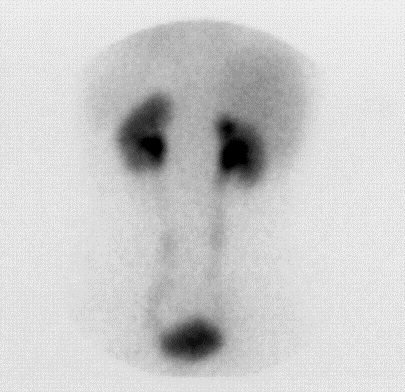

In [58]:
import PIL.Image
img=PIL.Image.open("image.jpg")
img

In [59]:
file_path=["image.jpg"]
titles=["Medical Image"]

In [60]:
prompt = """This image contains a human organ image  along with some notes and graph
Given the Medical image, describe the parameters  thoroughly as possible based on what you
see in the image, making sure to note all of the organ features and intensity and make simple RENOGRAM. Return output in json format:
{description:, diagnosis,Renogram features: [feature1, feature2, feature3, etc]}"""

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import datetime

# Function to load an image and convert it to grayscale
def load_image(file_path):
    img = Image.open(file_path).convert("L")
    img_array = np.array(img)
    return img_array

In [62]:
# Diagnostic function with criteria
def diagnose_image(img):
    mean_intensity = np.mean(img)
    std_intensity = np.std(img)
    threshold_mean = 0.5
    threshold_std = 0.1

    # Criteria for diagnosis
    if mean_intensity > threshold_mean and std_intensity > threshold_std:
        return "Abnormal scan detected"
    else:
        return "Scan appears normal"

In [63]:
# Function to calculate image metrics
def calculate_metrics(img):
    return {
        "Mean Intensity": np.mean(img),
        "Standard Deviation": np.std(img),
        "Minimum Intensity": np.min(img),
        "Maximum Intensity": np.max(img)
    }

In [64]:
# Function to generate a medical report
def generate_report(scan_id, scan_name, diagnosis, metrics, doctor_name):
    report = f"""
    ==========================================================================
                    Atomci Energy Medical Centre (AEMC)
                    JPMC,Rafique Shaheed Road, Karachi
    =========================================================================
    PRN ID             : {scan_id}
    Patient Name       : {scan_name}
    Diagnosis          : {diagnosis}

    Metrics:
    ----------------------------------------------------------
    Mean Intensity     : {metrics["Mean Intensity"]:.4f}
    Standard Deviation : {metrics["Standard Deviation"]:.4f}
    Minimum Intensity  : {metrics["Minimum Intensity"]:.4f}
    Maximum Intensity  : {metrics["Maximum Intensity"]:.4f}

    Report Generated by:
    Doctor             : {doctor_name}
    Date               : {datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")}
    ==========================================================
                                                          Dr.Bashir Ahmed
                                                    Consultant Nuclear Physician
    """
    return report

In [65]:
# Function to normalize the image intensity
def normalize_image(img):
    img_min, img_max = img.min(), img.max()
    normalized_img = (img - img_min) / (img_max - img_min)
    return normalized_img


In [66]:
# Diagnostic function with criteria
def diagnose_image(img):
    mean_intensity = np.mean(img)
    std_intensity = np.std(img)
    threshold_mean = 0.5
    threshold_std = 0.1

    # Criteria for diagnosis
    if mean_intensity > threshold_mean and std_intensity > threshold_std:
        return "Abnormal scan detected"
    else:
        return "Scan appears normal"

In [67]:
def process_and_generate_reports(file_path,  doctor_name):
    reports=[]   # Initialize an empty list to store the reports
    rows, cols = 2, 3
    fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
    axes = axes.flatten()

    for i, (file_path) in enumerate(zip(file_path)):
        if i >= len(axes):
            break

        img = load_image(file_path)
        normalized_img = normalize_image(img)
        diagnosis = diagnose_image(normalized_img)
        metrics = calculate_metrics(normalized_img)


        scan_id = i + 1

        # Append report
        report = generate_report(scan_id, diagnosis, metrics, doctor_name)
        reports.append(report)

        # Display image with diagnosis
        ax = axes[i]
        im = ax.imshow(normalized_img, cmap="gray")
        ax.set_title(f"{diagnosis}", fontsize=10)
        ax.axis("off")

    # Hide unused axes
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    # Add colorbar
    plt.tight_layout()
    plt.show()

    return reports  # Return the generated reports list


AttributeError: 'tuple' object has no attribute 'read'

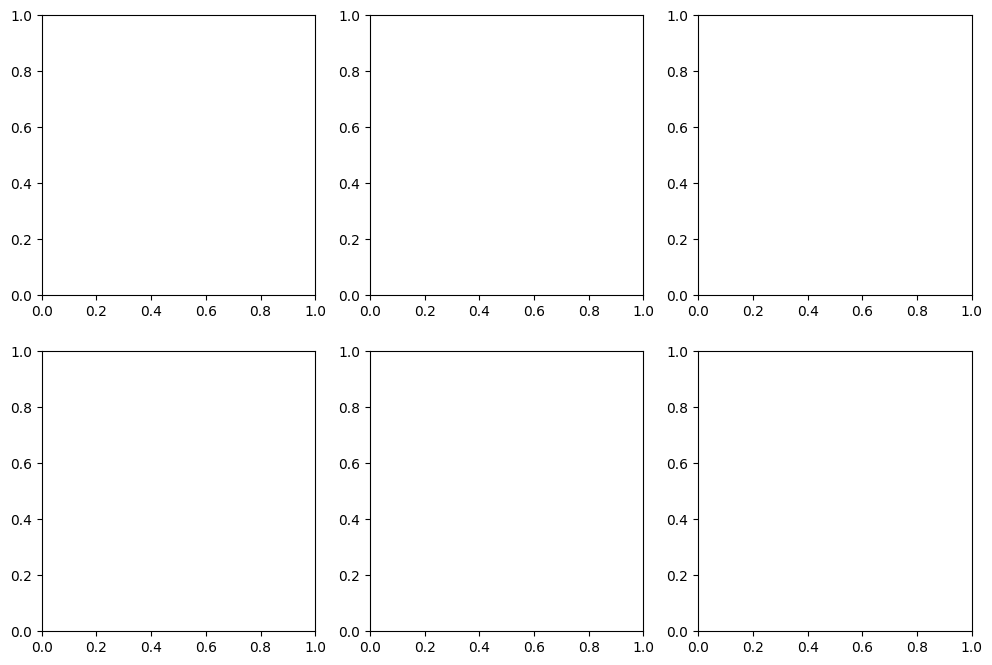

In [68]:
# Doctor's name
doctor_name = "Dr. Aneeqa Jabeen"  # Replace with actual doctor's name

# Process the images and generate reports
reports = process_and_generate_reports(file_path, doctor_name)

# Save reports to a text file
with open("medical_reports.txt", "w") as f:
    for report in reports:
        f.write(report + "\n\n")  # Use the correct `report` variable
print("Reports generated and saved as 'medical_reports.txt'.")

NameError: name 'reports' is not defined